<a href="https://colab.research.google.com/github/sanket-arch/SET_Conference/blob/main/SETProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing packages**

In [ ]:
#Installation of required libraries
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore")

**Importing Dataset**

In [ ]:
#Reading the dataset
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
#DPF=> DiabetesPedigreeFunction
df.rename(columns = {'DiabetesPedigreeFunction':'DPF',"BloodPressure":'BP'}, inplace = True)

In [ ]:
# The first 5 observation units of the data set were accessed.
df.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# The size of the data set was examined. It consists of 768 observation units and 9 variables.
df.shape

(768, 9)

In [ ]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BP             768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**1.Exploratory Data Analysis**

In [ ]:
# Descriptive statistics of the data set accessed.
df.describe()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# The distribution of the Outcome variable was examined.(in %)
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [ ]:
# The classes of the outcome variable were examined.
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

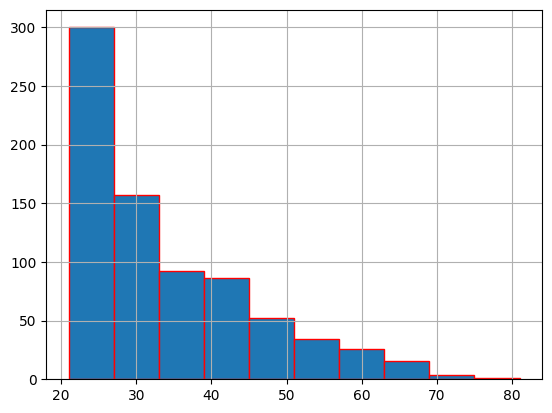

In [ ]:
# The histagram of the Age variable was reached.
df["Age"].hist(edgecolor = "red");

In [ ]:
print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()))

Max Age: 81 Min Age: 21


<Axes: xlabel='BMI', ylabel='Density'>

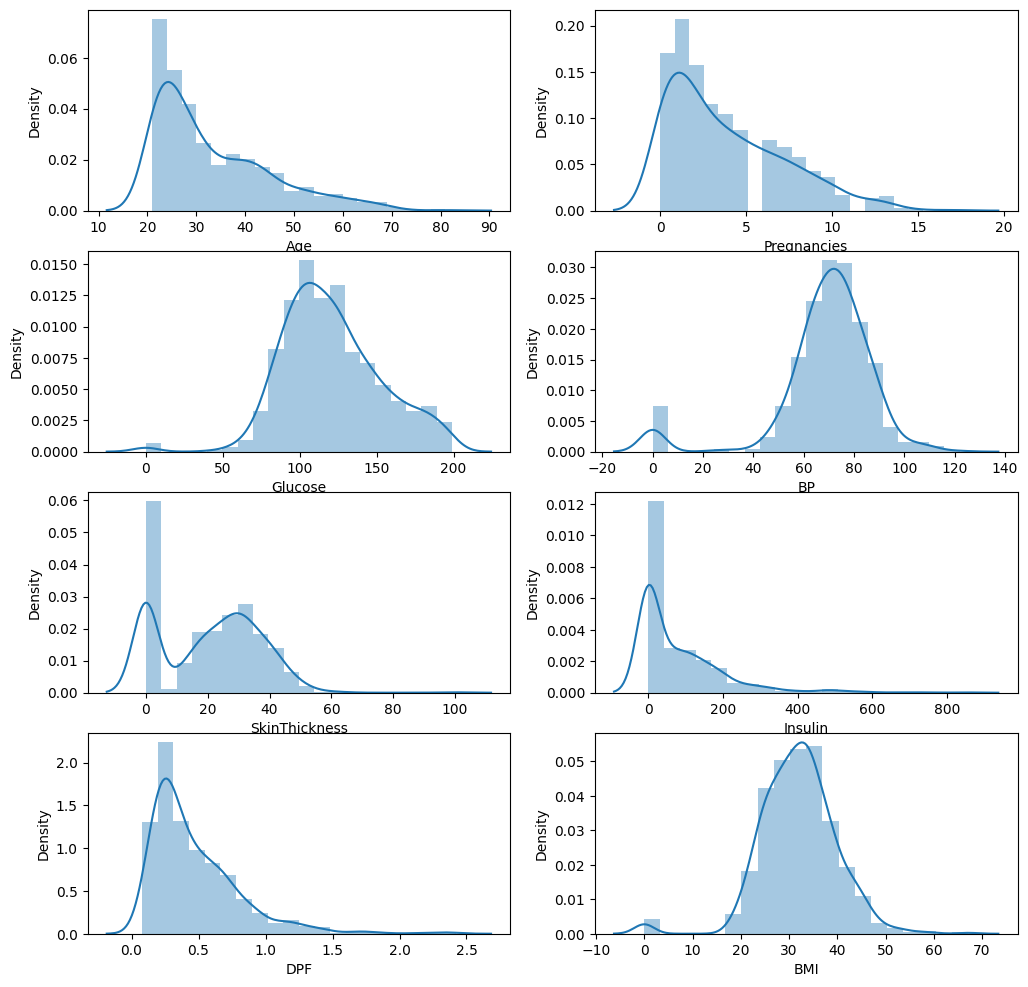

In [ ]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(12,12))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BP, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DPF, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1])

In [ ]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [ ]:
df.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [ ]:
df.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [ ]:
df.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [ ]:
df.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


In [ ]:
df.groupby("Outcome").agg({"Glucose": "mean"})


,Glucose
Outcome,
0,109.980000
1,141.257463


In [ ]:
df.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [ ]:
df.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


In [ ]:
# Access to the correlation of the data set was provided. What kind of relationship is examined between the variables. 
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 means no correlation.
# If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases. 
# When the correlations are examined, there are 2 variables that act as a positive correlation to the Salary dependent variable.
# These variables are Glucose. As these increase, Outcome variable increases.
df.corr()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DPF,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


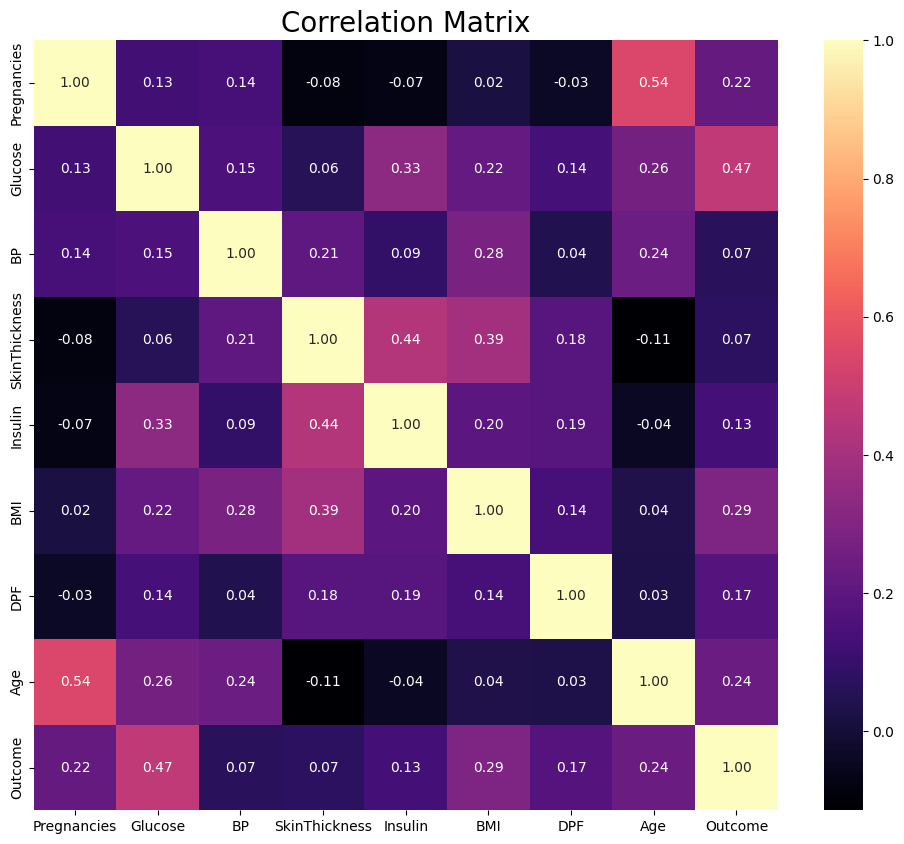

In [ ]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [12,10])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

**2.Data Preprocessing**

**2.1Missing Observation Analysis**

In [ ]:
df[['Glucose','BP','SkinThickness','Insulin','BMI']] = df[['Glucose','BP','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
df.head(10)

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [ ]:
# Now, we can look at where are missing values
df.isnull().sum()

Pregnancies        0
Glucose            5
BP                35
SkinThickness    227
Insulin          374
BMI               11
DPF                0
Age                0
Outcome            0
dtype: int64

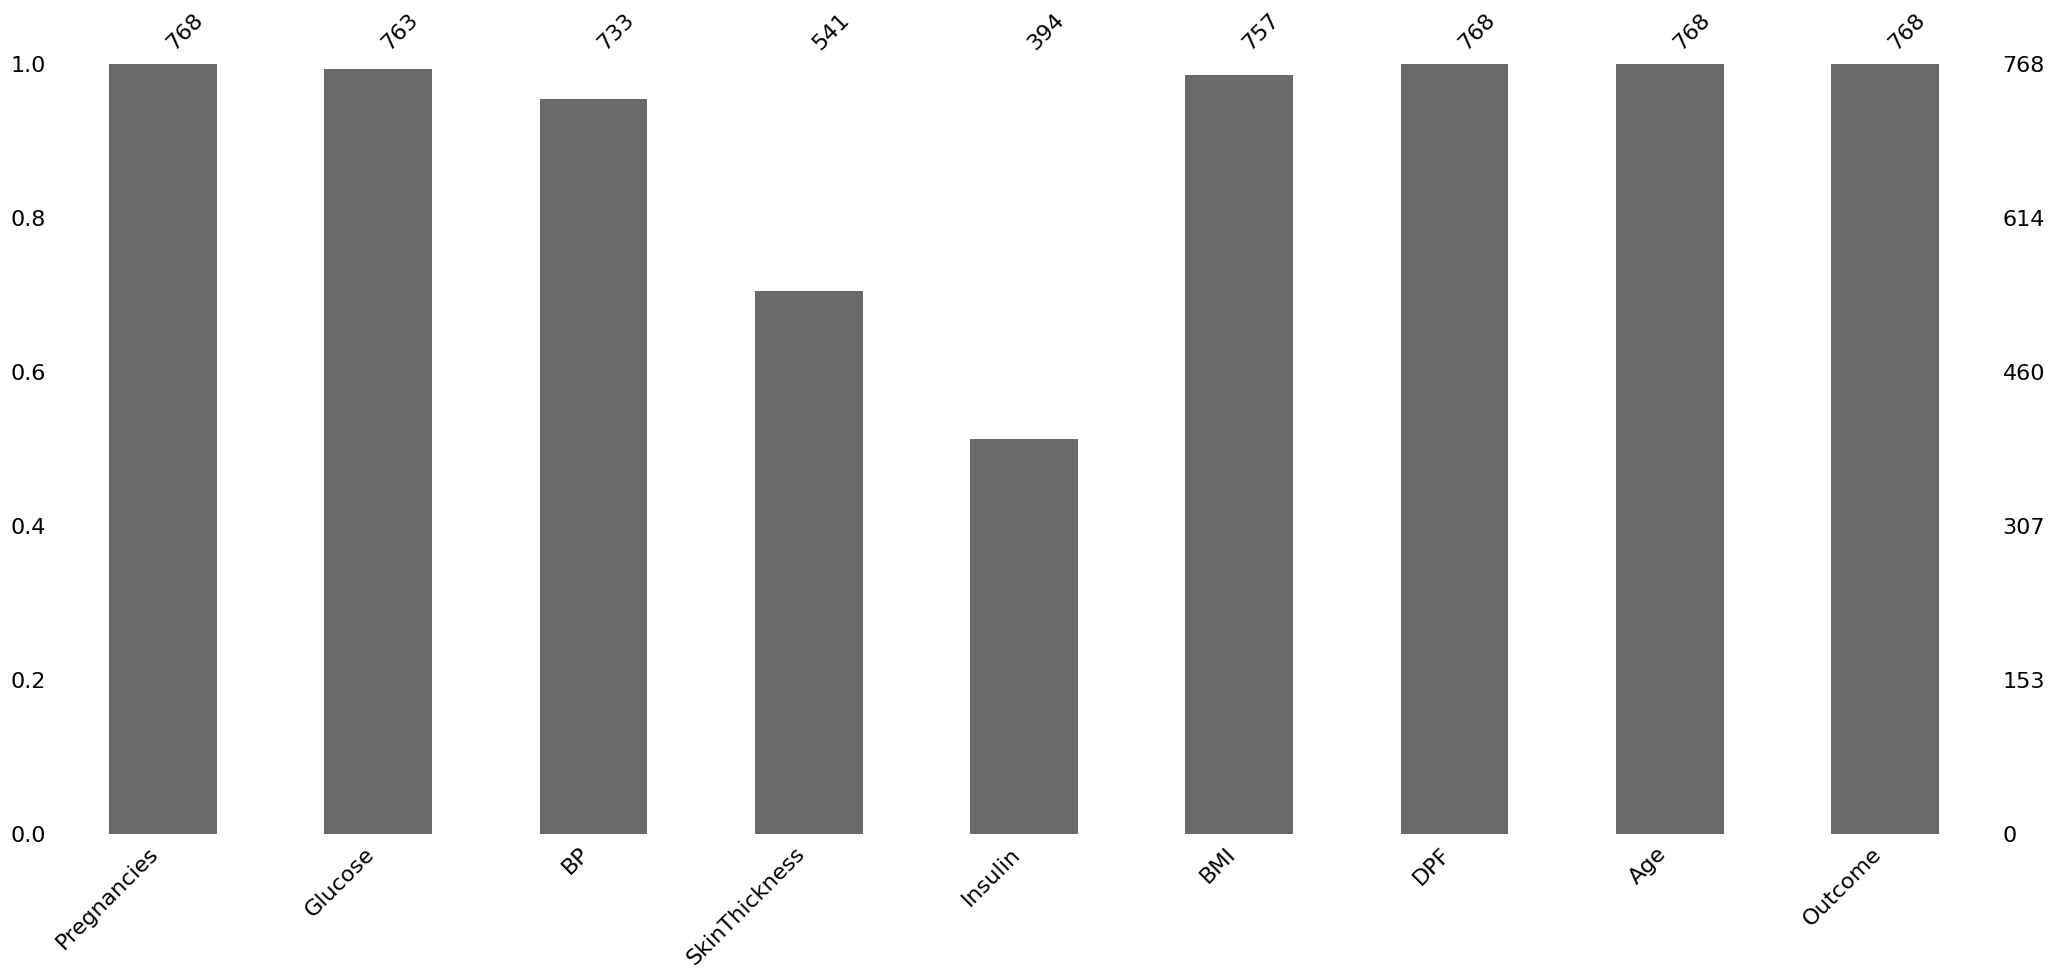

In [ ]:
# Have been visualized using the missingno library for the visualization of missing observations.
# Plotting 
import missingno as msno
msno.bar(df);

In [ ]:
# The missing values ​​will be filled with the mean values ​​of each variable.
def mean_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].mean().reset_index()
    return temp

In [ ]:
# The values to be given for incomplete observations are given the mean value of people who are not sick and the mean values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    mean_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = mean_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = mean_target(i)[i][1]

In [ ]:
df.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6.0,148.0,72.0,35.0,206.846154,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,130.287879,26.6,0.351,31.0,0
2,8.0,183.0,64.0,33.0,206.846154,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1


In [ ]:
# Missing values were filled.
df.isnull().sum()

Pregnancies      0
Glucose          0
BP               0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

**2.2 Outlier Observation Analysis**

In [ ]:
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in df:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature," --> present")
    elif df[(df[feature] < lower)].any(axis=None):
        print(feature," --> present")
    else:
        print(feature, " --> absent")

Pregnancies  --> present
Glucose  --> absent
BP  --> present
SkinThickness  --> present
Insulin  --> present
BMI  --> present
DPF  --> present
Age  --> present
Outcome  --> absent


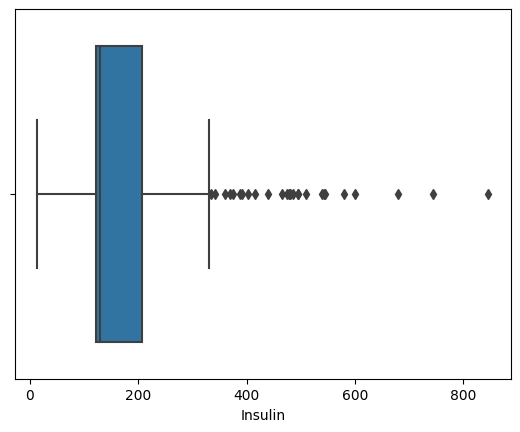

In [ ]:
# The process of visualizing the Insulin variable with boxplot method was done. We find the outlier observations on the chart.
sns.boxplot(x = df["Insulin"]);

In [ ]:
#We conduct a stand alone observation review for the Insulin variable
#We suppress contradictory values
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper

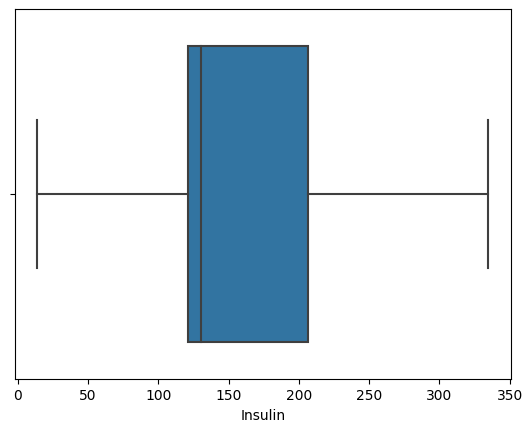

In [ ]:
sns.boxplot(x = df["Insulin"]);

**2.3 Local Outlier Factor (LOF)**

In [ ]:
# We determine outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [ ]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-3.26299564, -2.15032365, -2.10558187, -2.04848148, -1.95451646,
       -1.8895581 , -1.87688255, -1.8489646 , -1.83011668, -1.72438157,
       -1.61373422, -1.61146741, -1.60902703, -1.59957179, -1.59299996,
       -1.58821494, -1.58258358, -1.57888967, -1.56081075, -1.55002098,
       -1.54884785, -1.54592192, -1.52567073, -1.52238288, -1.51771243,
       -1.50769267, -1.50545038, -1.50105599, -1.50045504, -1.49770798])

In [ ]:
#We choose the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
threshold

-1.848964603156221

In [ ]:
#We delete those that are higher than the threshold
outlier = df_scores > threshold
df = df[outlier]

In [ ]:
# The size of the data set was examined.
df.shape

(760, 9)

**3. Feature Engineering**

In [ ]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [ ]:
df.head(10)

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome,NewBMI
0,6.0,148.0,72.000000,35.000000,206.846154,33.600000,0.627,50.0,1,Obesity 1
1,1.0,85.0,66.000000,29.000000,130.287879,26.600000,0.351,31.0,0,Overweight
2,8.0,183.0,64.000000,33.000000,206.846154,23.300000,0.672,32.0,1,Normal
3,1.0,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21.0,0,Overweight
4,0.0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33.0,1,Obesity 3
5,5.0,116.0,74.000000,27.235457,130.287879,25.600000,0.201,30.0,0,Overweight
6,3.0,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26.0,1,Obesity 1
7,10.0,115.0,70.877339,27.235457,130.287879,35.300000,0.134,29.0,0,Obesity 2
8,2.0,197.0,70.000000,45.000000,334.865385,30.500000,0.158,53.0,1,Obesity 1
9,8.0,125.0,96.000000,33.000000,206.846154,35.406767,0.232,54.0,1,Obesity 2


In [ ]:
# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [ ]:
# The operation performed was added to the dataframe.
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

df.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome,NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,206.846154,33.6,0.627,50.0,1,Obesity 1,Abnormal
1,1.0,85.0,66.0,29.0,130.287879,26.6,0.351,31.0,0,Overweight,Normal
2,8.0,183.0,64.0,33.0,206.846154,23.3,0.672,32.0,1,Normal,Abnormal
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0,Overweight,Normal
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1,Obesity 3,Abnormal


In [ ]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [ ]:
df.head()


,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,206.846154,33.6,0.627,50.0,1,Obesity 1,Abnormal,Secret
1,1.0,85.0,66.0,29.0,130.287879,26.6,0.351,31.0,0,Overweight,Normal,Normal
2,8.0,183.0,64.0,33.0,206.846154,23.3,0.672,32.0,1,Normal,Abnormal,Secret
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0,Overweight,Normal,Normal
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1,Obesity 3,Abnormal,Secret


**4. Converting categorical value into numerical values**

Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.

In [ ]:
# Here, by making One Hot Encoding transformation, categorical variables were converted into numerical values. It is also protected from the Dummy variable trap.
df = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [ ]:
df.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,148.0,72.0,35.0,206.846154,33.6,0.627,50.0,1,1,0,0,0,0,0,0,0,0,1
1,1.0,85.0,66.0,29.0,130.287879,26.6,0.351,31.0,0,0,0,0,1,0,1,0,1,0,0
2,8.0,183.0,64.0,33.0,206.846154,23.3,0.672,32.0,1,0,0,0,0,0,0,0,0,0,1
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0,0,0,0,1,0,1,0,1,0,0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1,0,0,1,0,0,0,0,0,0,1


In [ ]:
categorical_df = df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [ ]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1


In [ ]:
y = df["Outcome"]
X = df.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)
cols = X.columns
index = X.index

In [ ]:
X.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age
0,6.0,148.0,72.0,35.0,206.846154,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,130.287879,26.6,0.351,31.0
2,8.0,183.0,64.0,33.0,206.846154,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
# The variables in the data set are an effective factor in increasing the performance of the models by standardization.  
# There are multiple standardization methods. These are methods such as" Normalize"," MinMax"," Robust" and "Scale".
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [ ]:
X.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age
0,0.6,0.756098,0.000,0.875,0.902319,0.160665,0.669707,1.235294
1,-0.4,-0.780488,-0.375,0.125,0.000000,-0.614958,-0.049511,0.117647
2,1.0,1.609756,-0.500,0.625,0.902319,-0.980609,0.786971,0.176471
3,-0.4,-0.682927,-0.375,-0.625,-0.427690,-0.448753,-0.528990,-0.470588
4,-0.6,0.487805,-2.000,0.875,0.444476,1.213296,4.998046,0.235294


In [ ]:
X = pd.concat([X,categorical_df], axis = 1)

In [ ]:
X.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.6,0.756098,0.000,0.875,0.902319,0.160665,0.669707,1.235294,1,0,0,0,0,0,0,0,0,1
1,-0.4,-0.780488,-0.375,0.125,0.000000,-0.614958,-0.049511,0.117647,0,0,0,1,0,1,0,1,0,0
2,1.0,1.609756,-0.500,0.625,0.902319,-0.980609,0.786971,0.176471,0,0,0,0,0,0,0,0,0,1
3,-0.4,-0.682927,-0.375,-0.625,-0.427690,-0.448753,-0.528990,-0.470588,0,0,0,1,0,1,0,1,0,0
4,-0.6,0.487805,-2.000,0.875,0.444476,1.213296,4.998046,0.235294,0,0,1,0,0,0,0,0,0,1


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

**5. Base Models**

In [ ]:
# Validation scores of all base models

models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

# evaluate each model in turn
results = []
names = []

LR: 0.847368 (0.033391)
KNN: 0.821053 (0.012059)
CART: 0.855263 (0.032763)
RF: 0.863158 (0.032337)
SVM: 0.847368 (0.032868)
XGB: 0.896053 (0.024581)
LightGBM: 0.886842 (0.023684)


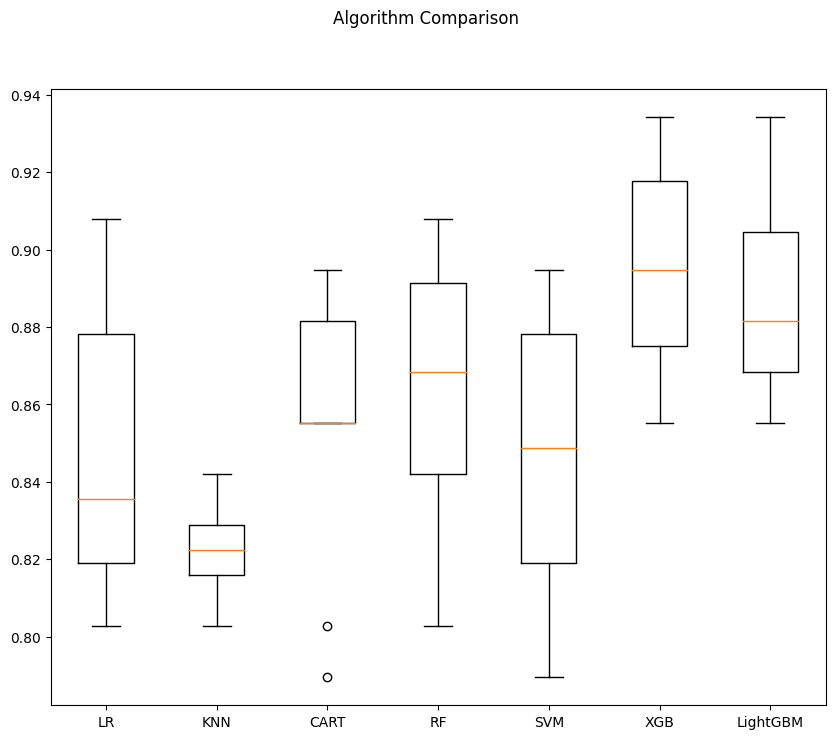

In [ ]:
for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 12345 , shuffle=True)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(10,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**6. Model tunning**

**6.1 Random Forest Tunning**

In [ ]:
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}

In [ ]:
rf_model = RandomForestClassifier(random_state = 12345)

In [ ]:
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [ ]:
gs_cv.best_params_

{'max_depth': 8,
 'max_features': 7,
 'min_samples_split': 2,
 'n_estimators': 1000}

**6.1.1) Final Model Installation**

In [ ]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)

In [ ]:
rf_tuned = rf_tuned.fit(X,y)

In [ ]:
cross_val_score(rf_tuned, X, y, cv = 10).mean()

0.8842105263157896

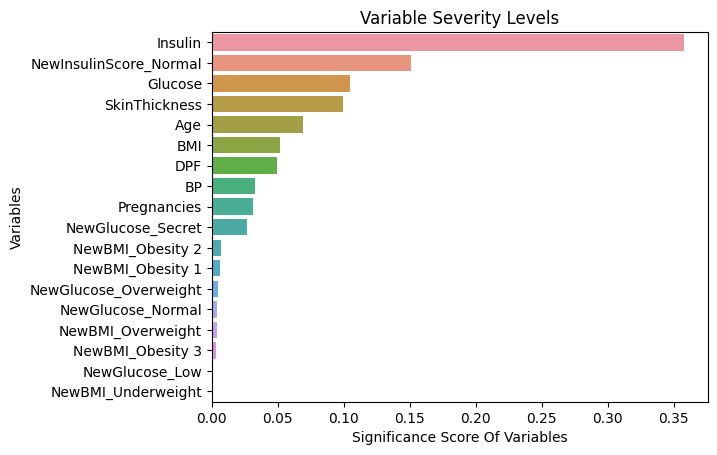

In [ ]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

**6.2 LightGBM Tuning**

In [ ]:
lgbm = LGBMClassifier(random_state = 12345)

In [ ]:
lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.5],
              "n_estimators": [500, 1000, 1500],
              "max_depth":[3,5,8]}

In [ ]:
gs_cv = GridSearchCV(lgbm, 
                     lgbm_params, 
                     cv = 10, 
                     n_jobs = -1, 
                     verbose = 2).fit(X, y)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


In [ ]:
gs_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

**6.2.1 Final Model Installation**

In [ ]:
lgbm_tuned = LGBMClassifier(**gs_cv.best_params_).fit(X,y)

In [ ]:
cross_val_score(lgbm_tuned, X, y, cv = 10).mean()

0.8973684210526317

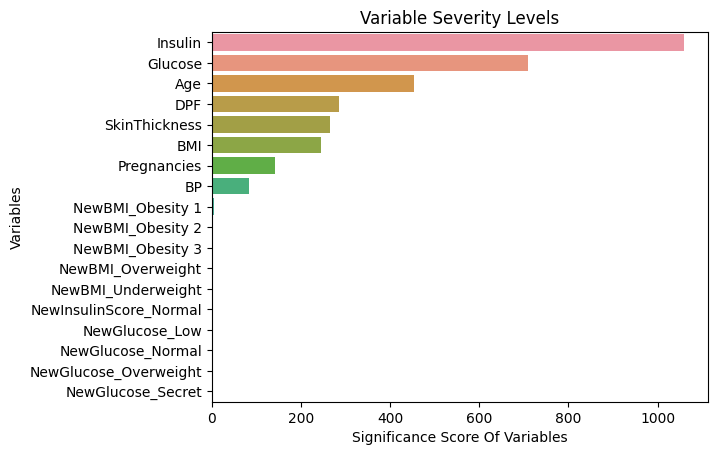

In [ ]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

**6.3 XGBoost Tuning**

In [ ]:
xgb = GradientBoostingClassifier(random_state = 12345)

In [ ]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}

In [ ]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X, y)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


In [ ]:
xgb_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 8,
 'min_samples_split': 0.3666666666666667,
 'n_estimators': 1000,
 'subsample': 1.0}

In [ ]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_).fit(X,y)

In [ ]:
cross_val_score(xgb_tuned, X, y, cv = 10).mean()

0.9013157894736843

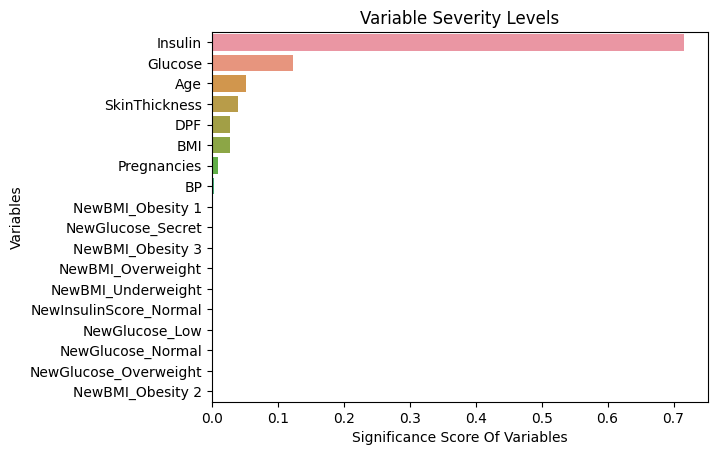

In [ ]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

**Comparison of final Models**

In [ ]:
models = []

models.append(('RF', RandomForestClassifier(random_state = 12345, max_depth = 8, max_features = 7, min_samples_split = 2, n_estimators = 500)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345, learning_rate = 0.1, max_depth = 5, min_samples_split = 0.1, n_estimators = 100, subsample = 1.0)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345, learning_rate = 0.01,  max_depth = 3, n_estimators = 1000)))

# evaluate each model in turn
results = []
names = []

RF: 0.888158 (0.040018)
XGB: 0.882895 (0.027253)
LightGBM: 0.884211 (0.028098)


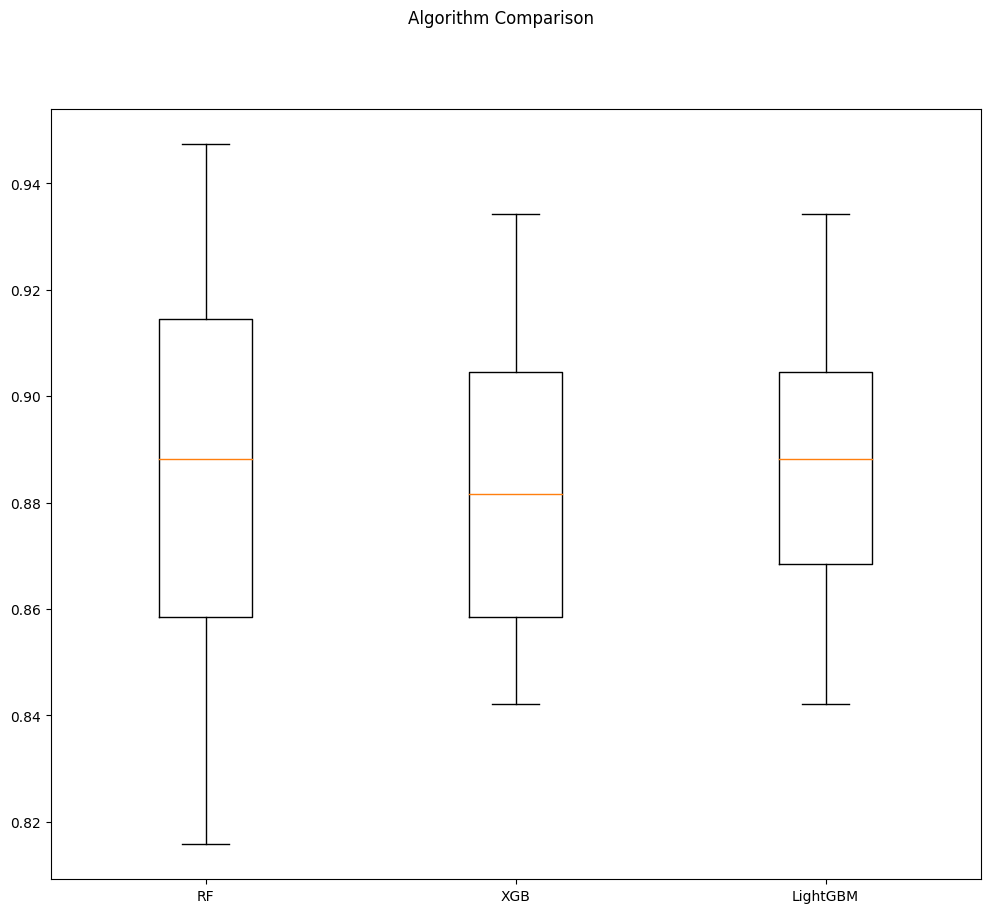

In [ ]:
for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 12345, shuffle=True)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(12,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()